In [ ]:
from google.colab import files
uploaded = files.upload()

Saving News-_dataset.zip to News-_dataset.zip


In [ ]:
import zipfile
import os


In [ ]:
zip_path = 'News-_dataset.zip'
extract_path = 'news_dataset_extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
os.listdir(extract_path)

['True.csv', 'Fake.csv']

In [ ]:
import pandas as pd
import glob

# Path to CSV files
files = glob.glob('/content/news_dataset_extracted/*.csv')

In [ ]:
# Read and combine
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

In [ ]:
# Combine into one
combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
# Preview
print(combined_df.shape)
combined_df.head()

(44898, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Step 4: Drop duplicates and nulls
combined_df = combined_df.drop_duplicates()
combined_df = combined_df.dropna()

In [ ]:
combined_df = combined_df.dropna()

In [ ]:
# Step 5: Check for remaining nulls
print("Null values in each column:\n", combined_df.isnull().sum())

Null values in each column:
 title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
combined_df.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
44893,False,False,False,False
44894,False,False,False,False
44895,False,False,False,False
44896,False,False,False,False


In [ ]:
# Train ML Model
!pip install nltk


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Apply cleaning function (use appropriate column, adjust if needed)
text_column = 'text' if 'text' in combined_df.columns else combined_df.columns[1]  # fallback to 2nd column if needed
combined_df['clean_text'] = combined_df[text_column].astype(str).apply(clean_text)


In [ ]:
# Step 7: Preview result
combined_df[['title', text_column, 'clean_text']].head()

,title,text,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattlewashington reuters president donald tru...


In [ ]:
print(combined_df['subject'].value_counts())

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get the subject value counts
subject_counts = combined_df['subject'].value_counts()

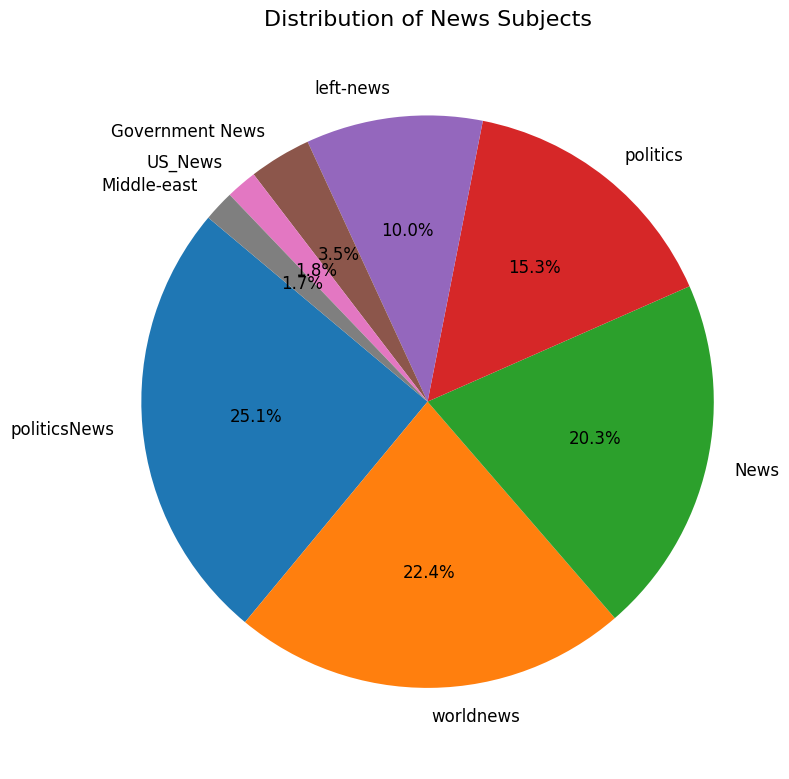

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

plt.title('Distribution of News Subjects', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

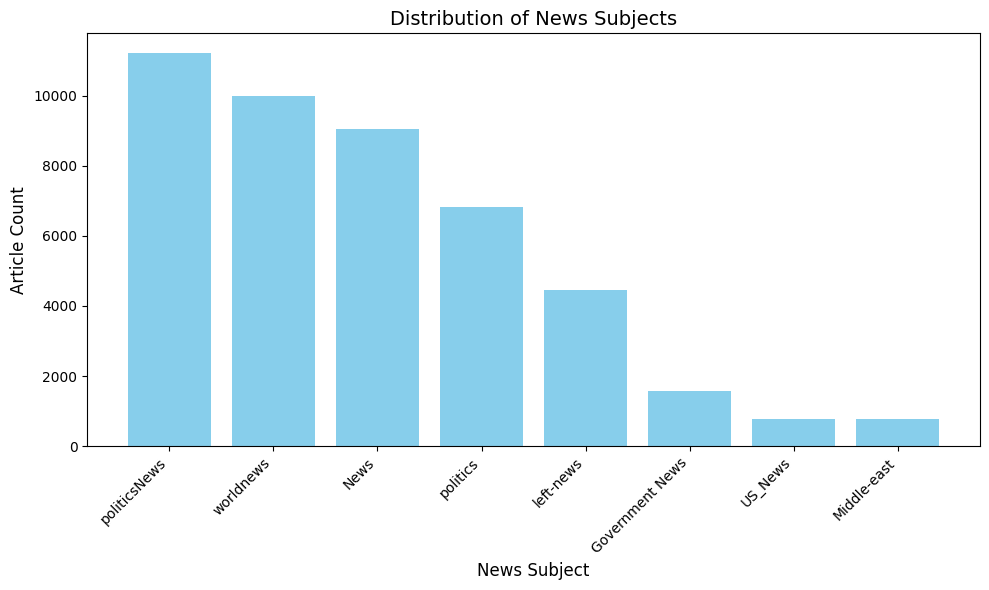

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(subject_counts.index, subject_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('News Subject', fontsize=12)
plt.ylabel('Article Count', fontsize=12)
plt.title('Distribution of News Subjects', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

plt.tight_layout()
plt.show()

In [ ]:
# Count each class in the 'subject' column
class_counts = combined_df['subject'].value_counts()

# Display the count and percentage
print("Class Distribution:\n")
for cls, count in class_counts.items():
    percent = (count / len(combined_df)) * 100
    print(f"{cls:>10}: {count} ({percent:.2f}%)")

Class Distribution:

politicsNews: 11220 (25.11%)
 worldnews: 9991 (22.36%)
      News: 9050 (20.25%)
  politics: 6838 (15.30%)
 left-news: 4459 (9.98%)
Government News: 1570 (3.51%)
   US_News: 783 (1.75%)
Middle-east: 778 (1.74%)


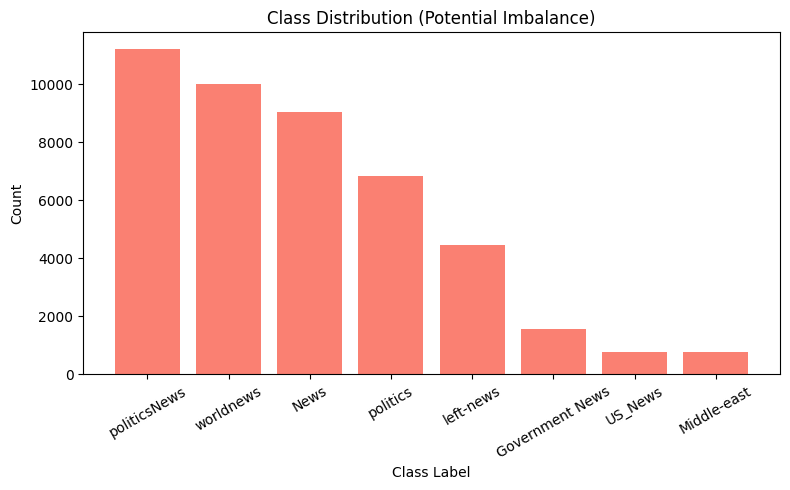

In [ ]:
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='salmon')
plt.title('Class Distribution (Potential Imbalance)')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate by class
df_majority = combined_df[combined_df['subject'].isin(['politicsNews', 'worldnews', 'News', 'politics'])]
df_minority = combined_df[~combined_df['subject'].isin(['politicsNews', 'worldnews', 'News', 'politics'])]

In [ ]:
# Upsample each minority class to match majority mean (~10k)
upsampled_minority = []
target_size = 9000

In [ ]:
for label in df_minority['subject'].unique():
    subset = df_minority[df_minority['subject'] == label]
    upsampled = resample(subset,
                         replace=True,
                         n_samples=target_size,
                         random_state=42)
    upsampled_minority.append(upsampled)

# Concatenate balanced data
df_balanced = pd.concat([df_majority] + upsampled_minority)

In [ ]:
# Show result
print("\nAfter Oversampling Minority:\n", df_balanced['subject'].value_counts())


After Oversampling Minority:
 subject
politicsNews       11220
worldnews           9991
News                9050
Government News     9000
US_News             9000
left-news           9000
Middle-east         9000
politics            6838
Name: count, dtype: int64


In [ ]:
# Downsample majority classes
downsampled_majority = []

target_size = 1500  # Match minority size

In [ ]:
for label in df_majority['subject'].unique():
    subset = df_majority[df_majority['subject'] == label]
    downsampled = resample(subset,
                           replace=False,
                           n_samples=target_size,
                           random_state=42)
    downsampled_majority.append(downsampled)

# Combine with all minority classes
df_balanced = pd.concat(downsampled_majority + [df_minority])

In [ ]:
# Show result
print("\nAfter Undersampling Majority:\n", df_balanced['subject'].value_counts())


After Undersampling Majority:
 subject
left-news          4459
Government News    1570
politicsNews       1500
worldnews          1500
politics           1500
News               1500
US_News             783
Middle-east         778
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

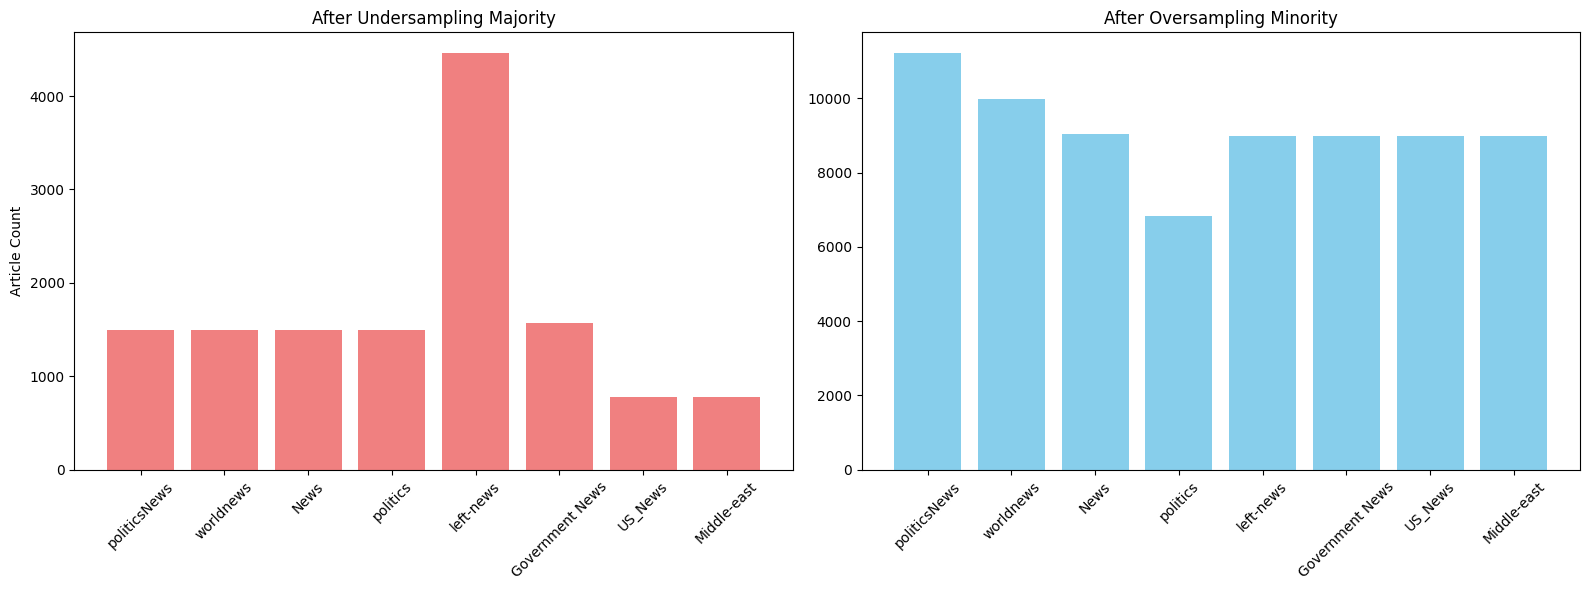

In [ ]:
# Manually define counts based on your results
undersample_counts = {
    'politicsNews': 1500,
    'worldnews': 1500,
    'News': 1500,
    'politics': 1500,
    'left-news': 4459,
    'Government News': 1570,
    'US_News': 783,
    'Middle-east': 778
}

oversample_counts = {
    'politicsNews': 11220,
    'worldnews': 9991,
    'News': 9050,
    'politics': 6838,
    'left-news': 9000,
    'Government News': 9000,
    'US_News': 9000,
    'Middle-east': 9000
}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Undersample Plot
axes[0].bar(undersample_counts.keys(), undersample_counts.values(), color='lightcoral')
axes[0].set_title('After Undersampling Majority')
axes[0].set_ylabel('Article Count')
axes[0].tick_params(axis='x', rotation=45)

# Oversample Plot
axes[1].bar(oversample_counts.keys(), oversample_counts.values(), color='skyblue')
axes[1].set_title('After Oversampling Minority')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

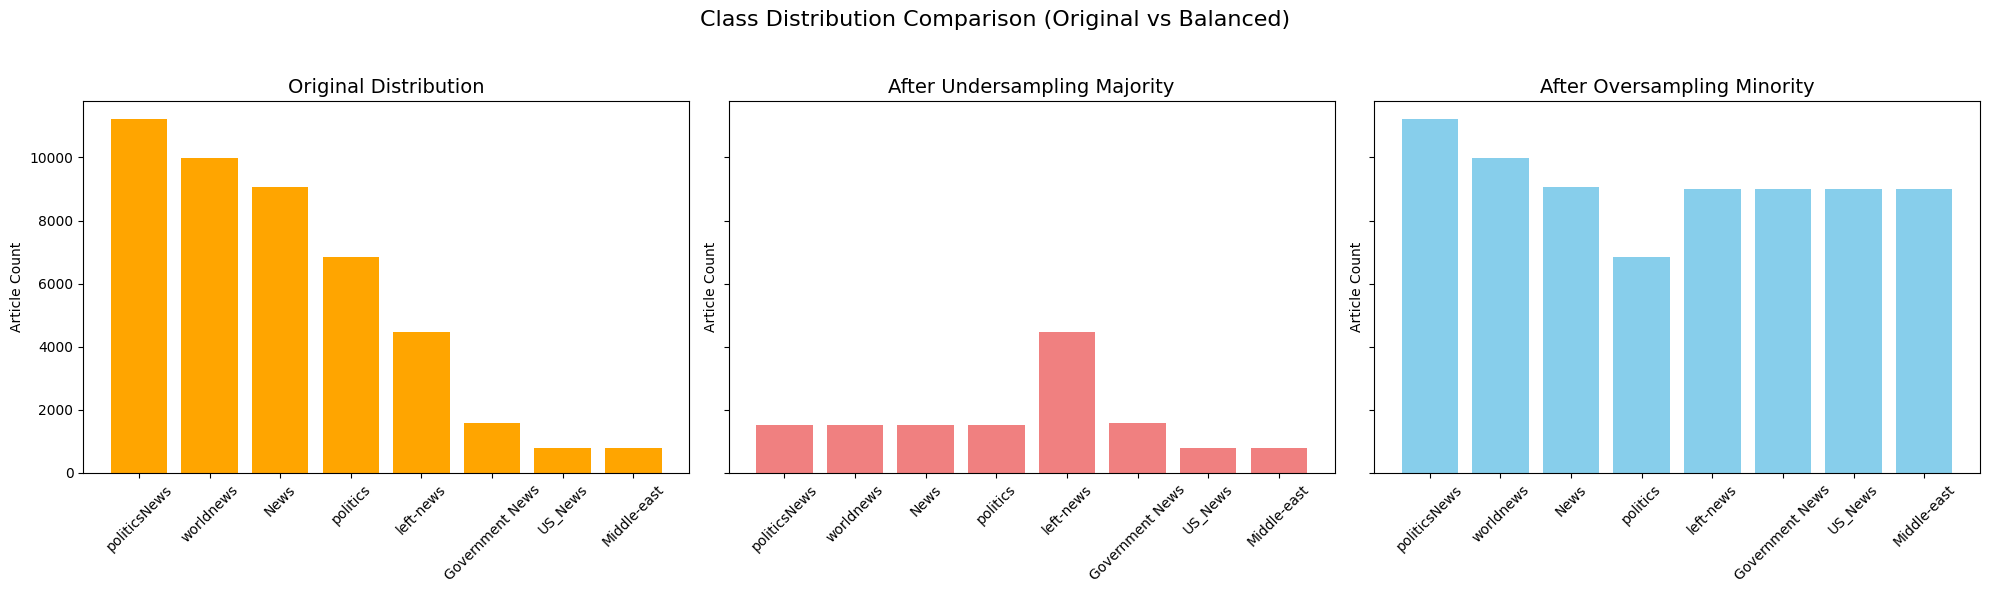

In [ ]:
import matplotlib.pyplot as plt

# Original class distribution (as seen earlier)
original_counts = {
    'politicsNews': 11220,
    'worldnews': 9991,
    'News': 9050,
    'politics': 6838,
    'left-news': 4459,
    'Government News': 1570,
    'US_News': 783,
    'Middle-east': 778
}

# After Undersampling Majority
undersample_counts = {
    'politicsNews': 1500,
    'worldnews': 1500,
    'News': 1500,
    'politics': 1500,
    'left-news': 4459,
    'Government News': 1570,
    'US_News': 783,
    'Middle-east': 778
}

# After Oversampling Minority
oversample_counts = {
    'politicsNews': 11220,
    'worldnews': 9991,
    'News': 9050,
    'politics': 6838,
    'left-news': 9000,
    'Government News': 9000,
    'US_News': 9000,
    'Middle-east': 9000
}

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot each distribution
for ax, counts, title, color in zip(
    axes,
    [original_counts, undersample_counts, oversample_counts],
    ['Original Distribution', 'After Undersampling Majority', 'After Oversampling Minority'],
    ['orange', 'lightcoral', 'skyblue']
):
    ax.bar(counts.keys(), counts.values(), color=color)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('Article Count')

plt.suptitle('Class Distribution Comparison (Original vs Balanced)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
from sklearn.utils import resample

# Majority classes
majority_labels = ['politicsNews', 'worldnews', 'politics', 'News']
minority_labels = [x for x in combined_df['subject'].unique() if x not in majority_labels]

# Undersample majority classes to target size
target_majority_size = 1500
downsampled_majorities = []
for label in majority_labels:
    subset = combined_df[combined_df['subject'] == label]
    downsampled_majorities.append(
        resample(subset, replace=False, n_samples=target_majority_size, random_state=42)
    )
df_majority_balanced = pd.concat(downsampled_majorities)

# Oversample minority classes to target size
target_minority_size = 1500
upsampled_minorities = []
for label in minority_labels:
    subset = combined_df[combined_df['subject'] == label]
    upsampled_minorities.append(
        resample(subset, replace=True, n_samples=target_minority_size, random_state=42)
    )
df_minority_balanced = pd.concat(upsampled_minorities)

# Combine both
df_balanced_combined = pd.concat([df_majority_balanced, df_minority_balanced])

# Check distribution
print(df_balanced_combined['subject'].value_counts(normalize=True) * 100)


subject
politicsNews       12.5
worldnews          12.5
politics           12.5
News               12.5
Government News    12.5
left-news          12.5
US_News            12.5
Middle-east        12.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Create target variable 'label' based on original filenames AFTER dropping duplicates and nulls
# Assuming 'Fake.csv' corresponds to label 0 and 'True.csv' corresponds to label 1
# We need to recreate the label based on the rows remaining in combined_df
combined_df['label'] = combined_df['subject'].apply(lambda x: 1 if x in ['politicsNews', 'worldnews'] else 0)


# Define X and y
X = combined_df['clean_text']
y = combined_df['label']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35751,)
X_test shape: (8938,)
y_train shape: (35751,)
y_test shape: (8938,)


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,
    min_df=5
)

In [ ]:
# Fit on training data and transform both sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Check shapes
print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape:", X_test_tfidf.shape)

TF-IDF Train shape: (35751, 35433)
TF-IDF Test shape: (8938, 35433)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Optional: install xgboost
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Results dictionary
results = []


🔍 Training: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



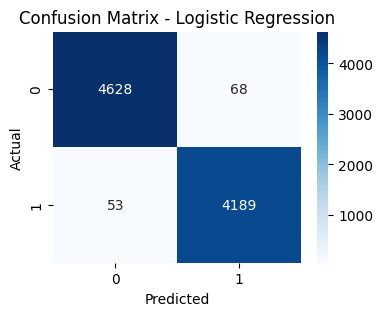


🔍 Training: SVM
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



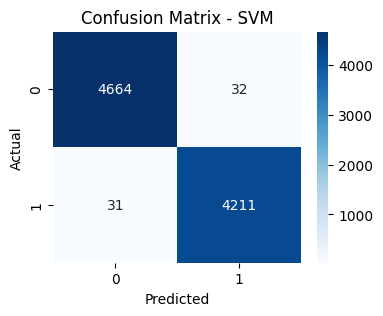


🔍 Training: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      1.00      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



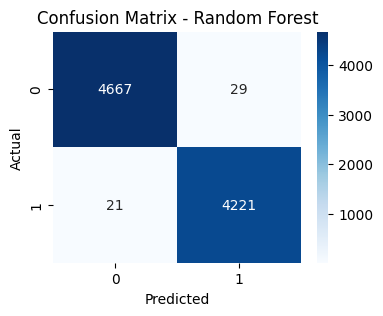


🔍 Training: Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4696
           1       0.93      0.94      0.94      4242

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



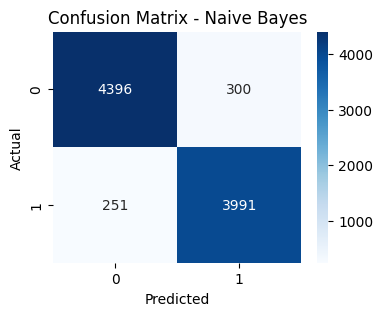


🔍 Training: KNN
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      4696
           1       0.96      0.32      0.47      4242

    accuracy                           0.67      8938
   macro avg       0.78      0.65      0.62      8938
weighted avg       0.78      0.67      0.62      8938



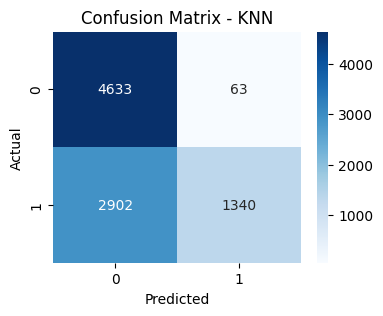


🔍 Training: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       0.99      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



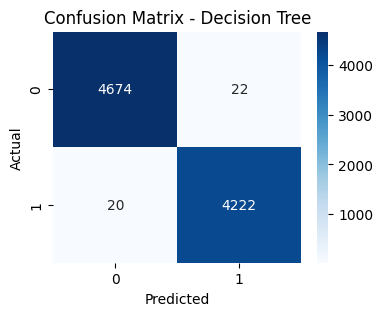


🔍 Training: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:15:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



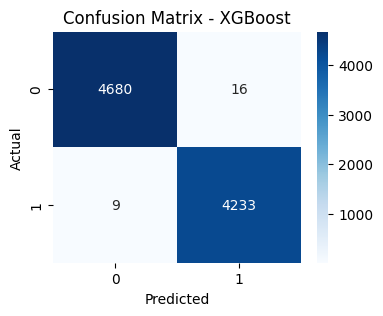

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(classification_report(y_test, y_pred))

    # Optional: Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
 # Show all results
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)
print("\n📊 Comparison of all models:")
print(results_df)


📊 Comparison of all models:
                 Model  Accuracy  Precision    Recall  F1 Score
6              XGBoost  0.997203   0.996234  0.997878  0.997056
5        Decision Tree  0.995301   0.994816  0.995285  0.995051
2        Random Forest  0.994406   0.993176  0.995050  0.994112
1                  SVM  0.992951   0.992458  0.992692  0.992575
0  Logistic Regression  0.986462   0.984026  0.987506  0.985763
3          Naive Bayes  0.938353   0.930086  0.940830  0.935427
4                  KNN  0.668270   0.955096  0.315889  0.474756


In [ ]:
import pickle

In [ ]:
# Save XGBoost model
xgb_model = models['XGBoost']
with open('xgboost_fake_news_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [ ]:
# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_tfidf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Predict and evaluate
y_pred_ada = ada_model.predict(X_test_tfidf)

In [ ]:
print("✅ AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

✅ AdaBoost Accuracy: 0.9944059073618259
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      1.00      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Base estimators
estimators = [
    ('nb', MultinomialNB()),
    ('svc', LinearSVC(max_iter=5000)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

In [ ]:
# Final estimator
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

In [ ]:
# Train Stacking
stack_model.fit(X_train_tfidf, y_train)


StackingClassifier(cv=5,
                   estimators=[('nb', MultinomialNB()),
                               ('svc', LinearSVC(max_iter=5000)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Predict and evaluate
y_pred_stack = stack_model.predict(X_test_tfidf)

print("✅ Stacking Ensemble Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

✅ Stacking Ensemble Accuracy: 0.9979861266502573
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
# Define base learners
base_learners = [
    ('nb', MultinomialNB()),
    ('svc', SVC(kernel='linear', probability=True)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42))
]

In [ ]:
# Define meta learner
meta_learner = LogisticRegression()

In [ ]:
# Create stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

In [ ]:
# Train
stacking_model.fit(X_train_tfidf, y_train)

# Evaluate
print("Accuracy:", stacking_model.score(X_test_tfidf, y_test))

Accuracy: 0.9963078988588051
